#### 1. 베이지안 필터기 -> 부/긍정 평가  
      => 네이버 영화 평가
#### 2. IMDB -> 추천시스템
#### 3. 조건부확률  
    비가 내리는 날에 교통사고 발생될 확률 => P(교통사고 | 비)  
#### 4. 베이즈 정리  
    전체 손님 수 : 100  
    노트 구매 : 50  
    펜 구매 : 20  
    두 가지 모두 구매 : 10  

    노트, 펜 모두 구매할 확률?  
    50/100 * 10/50 => 1/10  
    20/100 * 10/20 => 1/10  

    A와 B의 결합확률 = P(A|B)*P(B)

#### 5. 나이브베이즈 분류기 
    : 베이즈 정리를 기반으로 작성된 분류기   
    A:입력테스트, B:카테고리(스팸/햄)  
    =>   
    P(B|A) => 여러개 카테고리지만 입력테스트는 동일

    ex)  
    P(스팸|나이트, 형님, 강호동,...) : 나이트라는 텍스트가 스팸, 햄 모두에 들어간다는 의미  
    P(햄|나이트)   
    => 나이트는 모두 들어가므로 수식에서 빼도 됨   
    P(B|A) => 여러개 카테고리지만 입력테스트는 동일   
    : P(A|B)*P(B) / P(A) => P(A|B)*P(B) (계산이 많아지니깐 P(A)를 빼고 계산하고자 함)  

    P(B)는 각 카테고리로 분류될 확률  
    P(A|B) : A는 단어들의 집합(aN)
    P(A|B)=P(a1|B)P(a2|B)....P(aN|B)

    P(aN|B)의 확률은 단어가 카테고리에 속학 확률  

    정리하면, P(A|B)*P(B)를 카테고리별로 계산하면 됨  
    P(B|A)는 각 카테고리별로 P(A|B)*P(B)을 구하고 최대값을 출력하면 됨  
    P(카테1|나이트, 강호동, 형님) = ?
    P(카테2|나이트, 강호동, 형님) = ?
    P(카테3|나이트, 강호동, 형님) = ?
    MAX???

### 나이브 베이지안 필터기
직접 코딩하기

In [88]:
from konlpy.tag import Okt

In [259]:
class BayesianFilter: # 붕어빵 기계(클래스)
    def __init__(self): # self:자신(만들어질 객체, 붕어빵)
        self.words=set() #붕어빵 길이 = 15센티
        self.words_dict={} #카테고리(광고/중요) 단어 빈도수
        self.category_dict={} 
    
    def split(self,text): # 어미/조사/구두점 제외, 형태소 분석
        result=[]
        okt=Okt()
        malist=okt.pos(text, norm=True, stem=True)
        for word in malist:
            if word[1] not in ["Josa","Eomi","Punctuation"]:
                result.append(word[0])
        return result
            #print(word[1])
            #조사, 어미, 구두점을 제외한 나머지 단어만
            # result에 저장
    
    def inc_word(self,word, category): #파격, 광고 / 오늘, 광고
        # 단어를 카테고리에 추가
        if not category in self.words_dict: #{'광고:{}'}
            self.words_dict[category]={}
        if not word in self.words_dict[category]:
            self.words_dict[category][word]=0 #{'광고:{'파격':0}'}
        self.words_dict[category][word] += 1 #{'광고:{'파격':1,'오늘':1}','중요':{}}
        self.words.add(word) #{'파격','오늘'}, words자체는 set이므로 중복이 들어가지 않음
    
    def inc_category(self, category):
        if not category in self.category_dict:
            self.category_dict[category]=0
        self.category_dict[category]+=1
        
    
    # 예측 
    def predict(self,text):
        score_list=[]
        ad_score=1
        im_score=1
        word_list=self.split(text)
        for category in self.words_dict.keys():
            if category == "광고":
                ad=self.words_dict.get(category)
                ad_sum=sum(ad.values())
            else:
                important=self.words_dict.get(category)
                important_sum=sum(important.values())
#         print(ad, ad_sum, important,important_sum)   
        for w in word_list:
            for word in ad.keys():
                if not w in word:
                    freq=1
                else:
                    freq=ad[word]
            ad_score *= freq/ad_sum
        print(ad_score)
        
        for w in word_list:
            for word in important.keys():
                if not w in word:
                    freq=1
                else:
                    freq=ad[word]
            im_score *= freq/important_sum
        print(im_score)
        scorelist.append()
                    
    def fit(self,text,category):
        word_list=self.split(text)
        for word in word_list:
            self.inc_word(word,category)
        self.inc_category(category)
#         print(word_list)
  

In [260]:
bs=BayesianFilter() # 붕어빵 기계에서 붕어빵 1개 만들어라
bs.fit("파격세일 - 오늘까지만 50% 할인","광고")
bs.fit("무료 쿠폰 선물 & 무료 배송","광고")
bs.fit("아사히 맥주 세일","광고")
bs.fit("회의 일정 확인 부탁드립니다.","중요")
bs.fit("오늘 일정이 없습니다.","중요")
bs.fit("현데계 백화점 세일", "광고")
bs.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bs.fit("인기 제품 기간 한정 세일", "광고")
bs.fit("오늘 일정 확인", "중요")
bs.fit("프로젝트 진행 상황 보고","중요")
bs.fit("계약 잘 부탁드립니다","중요")
bs.fit("회의 일정이 등록되었습니다.","중요")

bs.predict("재고 정리 할인, 배송")
# res,socrelist=bs.predict("재고 정리 할인, 배송")
# print("결과:",res) # 중요 or 광고
# print(scorelist) # 중요메일/광고메일 베이지안 필터기 각 확률

8.432264881050256e-07
5.141890467449261e-06


### keras 선형회귀, 로지스틱 회귀 


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

In [68]:
# 선형회귀
x=np.array([1,2,3,4,5,6,7,8,9]) #공부시간
y=np.array([12,23,34,45,56,77,88,100,90]) #점수
# 7.5 시간 공부? 점수?
model=Sequential()
model.add(Dense(1,input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

W0812 16:02:34.601305 14200 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 16:02:34.609284 14200 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
9/9 [==============================] - 0s 34ms/step - loss: 466.7593 - mean_squared_error: 466.7593
Epoch 2/300
9/9 [==============================] - 0s 889us/step - loss: 94.6346 - mean_squared_error: 94.6346
Epoch 3/300
9/9 [==============================] - 0s 884us/step - loss: 94.0721 - mean_squared_error: 94.0721
Epoch 4/300
9/9 [==============================] - 0s 885us/step - loss: 93.5924 - mean_squared_error: 93.5924
Epoch 5/300
9/9 [==============================] - 0s 773us/step - loss: 93.1887 - mean_squared_error: 93.1887
Epoch 6/300
9/9 [==============================] - 0s 997us/step - loss: 92.8545 - mean_squared_error: 92.8545
Epoch 7/300
9/9 [==============================] - 0s 776us/step - loss: 92.5839 - mean_squared_error: 92.5839
Epoch 8/300
9/9 [==============================] - 0s 997us/step - loss: 92.3715 - mean_squared_error: 92.3715
Epoch 9/300
9/9 [==============================] - 0s 772us/step - loss: 92.2120 - mean_squared_error: 92.2120


9/9 [==============================] - 0s 1ms/step - loss: 107.3123 - mean_squared_error: 107.3123
Epoch 145/300
9/9 [==============================] - 0s 665us/step - loss: 107.3246 - mean_squared_error: 107.3246
Epoch 146/300
9/9 [==============================] - 0s 887us/step - loss: 107.3366 - mean_squared_error: 107.3366
Epoch 147/300
9/9 [==============================] - 0s 886us/step - loss: 107.3481 - mean_squared_error: 107.3481
Epoch 148/300
9/9 [==============================] - 0s 776us/step - loss: 107.3594 - mean_squared_error: 107.3594
Epoch 149/300
9/9 [==============================] - 0s 886us/step - loss: 107.3702 - mean_squared_error: 107.3702
Epoch 150/300
9/9 [==============================] - 0s 887us/step - loss: 107.3807 - mean_squared_error: 107.3807
Epoch 151/300
9/9 [==============================] - 0s 886us/step - loss: 107.3908 - mean_squared_error: 107.3908
Epoch 152/300
9/9 [==============================] - 0s 776us/step - loss: 107.4007 - mean_squar

9/9 [==============================] - 0s 665us/step - loss: 107.6868 - mean_squared_error: 107.6868
Epoch 286/300
9/9 [==============================] - 0s 886us/step - loss: 107.6869 - mean_squared_error: 107.6869
Epoch 287/300
9/9 [==============================] - 0s 776us/step - loss: 107.6870 - mean_squared_error: 107.6870
Epoch 288/300
9/9 [==============================] - 0s 776us/step - loss: 107.6870 - mean_squared_error: 107.6870
Epoch 289/300
9/9 [==============================] - 0s 886us/step - loss: 107.6872 - mean_squared_error: 107.6872
Epoch 290/300
9/9 [==============================] - 0s 887us/step - loss: 107.6873 - mean_squared_error: 107.6873
Epoch 291/300
9/9 [==============================] - 0s 776us/step - loss: 107.6874 - mean_squared_error: 107.6874
Epoch 292/300
9/9 [==============================] - 0s 776us/step - loss: 107.6875 - mean_squared_error: 107.6875
Epoch 293/300
9/9 [==============================] - 0s 666us/step - loss: 107.6875 - mean_squ

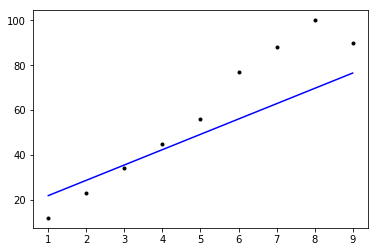

In [70]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x),'b',x,y,'k.')

In [72]:
print(model.predict([7.5]))

[[66.2594]]


In [73]:
# 로지스틱 회귀
x=np.array([1,2,3,4,5,6,7,8,9])#공부시간
y=np.array([0,0,0,0,0,1,1,1,1])#합격여부
#7.5시간 공부? 
model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

W0812 16:23:33.288491 14200 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
9/9 [==============================] - 0s 27ms/step - loss: 0.9858 - binary_accuracy: 0.5556
Epoch 2/300
9/9 [==============================] - 0s 994us/step - loss: 0.7252 - binary_accuracy: 0.6667
Epoch 3/300
9/9 [==============================] - 0s 887us/step - loss: 0.6726 - binary_accuracy: 0.3333
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6650 - binary_accuracy: 0.4444
Epoch 5/300
9/9 [==============================] - 0s 772us/step - loss: 0.6636 - binary_accuracy: 0.4444
Epoch 6/300
9/9 [==============================] - 0s 997us/step - loss: 0.6621 - binary_accuracy: 0.4444
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6601 - binary_accuracy: 0.4444
Epoch 8/300
9/9 [==============================] - 0s 773us/step - loss: 0.6576 - binary_accuracy: 0.4444
Epoch 9/300
9/9 [==============================] - 0s 883us/step - loss: 0.6548 - binary_accuracy: 0.4444
Epoch 10/300
9/9 [==============================] -

9/9 [==============================] - 0s 776us/step - loss: 0.4958 - binary_accuracy: 0.7778
Epoch 78/300
9/9 [==============================] - 0s 887us/step - loss: 0.4941 - binary_accuracy: 0.7778
Epoch 79/300
9/9 [==============================] - 0s 665us/step - loss: 0.4924 - binary_accuracy: 0.7778
Epoch 80/300
9/9 [==============================] - 0s 997us/step - loss: 0.4907 - binary_accuracy: 0.7778
Epoch 81/300
9/9 [==============================] - 0s 997us/step - loss: 0.4890 - binary_accuracy: 0.7778
Epoch 82/300
9/9 [==============================] - 0s 888us/step - loss: 0.4873 - binary_accuracy: 0.7778
Epoch 83/300
9/9 [==============================] - 0s 775us/step - loss: 0.4857 - binary_accuracy: 0.7778
Epoch 84/300
9/9 [==============================] - 0s 776us/step - loss: 0.4840 - binary_accuracy: 0.7778
Epoch 85/300
9/9 [==============================] - 0s 887us/step - loss: 0.4824 - binary_accuracy: 0.7778
Epoch 86/300
9/9 [==============================] 

9/9 [==============================] - 0s 887us/step - loss: 0.3974 - binary_accuracy: 0.8889
Epoch 153/300
9/9 [==============================] - 0s 776us/step - loss: 0.3964 - binary_accuracy: 0.8889
Epoch 154/300
9/9 [==============================] - 0s 887us/step - loss: 0.3954 - binary_accuracy: 0.8889
Epoch 155/300
9/9 [==============================] - 0s 886us/step - loss: 0.3944 - binary_accuracy: 0.8889
Epoch 156/300
9/9 [==============================] - 0s 775us/step - loss: 0.3935 - binary_accuracy: 0.8889
Epoch 157/300
9/9 [==============================] - 0s 997us/step - loss: 0.3925 - binary_accuracy: 0.8889
Epoch 158/300
9/9 [==============================] - 0s 886us/step - loss: 0.3915 - binary_accuracy: 0.8889
Epoch 159/300
9/9 [==============================] - 0s 997us/step - loss: 0.3906 - binary_accuracy: 0.8889
Epoch 160/300
9/9 [==============================] - 0s 886us/step - loss: 0.3897 - binary_accuracy: 0.8889
Epoch 161/300
9/9 [=======================

9/9 [==============================] - 0s 887us/step - loss: 0.3374 - binary_accuracy: 0.8889
Epoch 229/300
9/9 [==============================] - 0s 886us/step - loss: 0.3368 - binary_accuracy: 0.8889
Epoch 230/300
9/9 [==============================] - 0s 887us/step - loss: 0.3362 - binary_accuracy: 0.8889
Epoch 231/300
9/9 [==============================] - 0s 776us/step - loss: 0.3356 - binary_accuracy: 0.8889
Epoch 232/300
9/9 [==============================] - 0s 997us/step - loss: 0.3350 - binary_accuracy: 0.8889
Epoch 233/300
9/9 [==============================] - 0s 776us/step - loss: 0.3343 - binary_accuracy: 0.8889
Epoch 234/300
9/9 [==============================] - 0s 886us/step - loss: 0.3337 - binary_accuracy: 0.8889
Epoch 235/300
9/9 [==============================] - 0s 665us/step - loss: 0.3331 - binary_accuracy: 0.8889
Epoch 236/300
9/9 [==============================] - 0s 997us/step - loss: 0.3325 - binary_accuracy: 0.8889
Epoch 237/300
9/9 [=======================

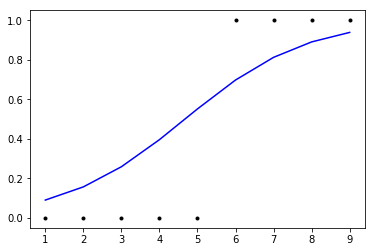

In [74]:
plt.plot(x, model.predict(x),'b',x,y,'k.')

In [76]:
model.predict([15, 17])
model.predict([0.5, 1.5])

array([[0.9984981 ],
       [0.99957293]], dtype=float32)

In [82]:
#hx=w1x1+w2x2+w3x3+b
x=np.array([[100,90,80],[55,45,36],[77,88,90]])#중간,기말,최종
y=np.array([92, 70, 88])
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 61ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 8/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 9/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.

3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 74/300
3/3 [==============================] - 0s 998us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 75/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 76/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 77/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 78/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 79/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 80/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 81/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.000

3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 146/300
3/3 [==============================] - 0s 995us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 147/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 148/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 149/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 150/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 151/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 152/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 153/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accurac

3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 217/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 218/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 219/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 220/300
3/3 [==============================] - 0s 997us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 221/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 222/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 223/300
3/3 [==============================] - 0s 997us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 224/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accur

3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 287/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 288/300
3/3 [==============================] - 0s 998us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 289/300
3/3 [==============================] - 0s 997us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 290/300
3/3 [==============================] - 0s 997us/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 291/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 292/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 293/300
3/3 [==============================] - 0s 1ms/step - loss: -1312.5896 - binary_accuracy: 0.0000e+00
Epoch 294/300
3/3 [==============================] - 0s 2ms/step - loss: -1312.5896 - binary_acc

In [81]:
model.predict(x) #[92, 70, 88]

array([[100.27   ],
       [ 52.01368],
       [ 88.93912]], dtype=float32)

In [140]:
#다중 로지스틱 회귀
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1])
model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 52ms/step - loss: 0.6359 - binary_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6300 - binary_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 997us/step - loss: 0.6242 - binary_accuracy: 0.7500
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6185 - binary_accuracy: 0.7500
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6131 - binary_accuracy: 0.7500
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6077 - binary_accuracy: 0.7500
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6026 - binary_accuracy: 0.7500
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.5976 - binary_accuracy: 0.7500
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.5927 - binary_accuracy: 0.7500
Epoch 10/300
4/4 [==============================] - 0s 1ms/st

4/4 [==============================] - 0s 1ms/step - loss: 0.4323 - binary_accuracy: 0.7500
Epoch 79/300
4/4 [==============================] - 0s 997us/step - loss: 0.4312 - binary_accuracy: 0.7500
Epoch 80/300
4/4 [==============================] - 0s 995us/step - loss: 0.4301 - binary_accuracy: 0.7500
Epoch 81/300
4/4 [==============================] - 0s 1000us/step - loss: 0.4291 - binary_accuracy: 0.7500
Epoch 82/300
4/4 [==============================] - 0s 997us/step - loss: 0.4280 - binary_accuracy: 0.7500
Epoch 83/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4270 - binary_accuracy: 0.7500
Epoch 84/300
4/4 [==============================] - 0s 997us/step - loss: 0.4260 - binary_accuracy: 0.7500
Epoch 85/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4250 - binary_accuracy: 0.7500
Epoch 86/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4240 - binary_accuracy: 0.7500
Epoch 87/300
4/4 [==============================] - 0s 99

4/4 [==============================] - 0s 1ms/step - loss: 0.3759 - binary_accuracy: 0.7500
Epoch 155/300
4/4 [==============================] - 0s 998us/step - loss: 0.3754 - binary_accuracy: 0.7500
Epoch 156/300
4/4 [==============================] - 0s 998us/step - loss: 0.3749 - binary_accuracy: 0.7500
Epoch 157/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3743 - binary_accuracy: 0.7500
Epoch 158/300
4/4 [==============================] - 0s 994us/step - loss: 0.3738 - binary_accuracy: 0.7500
Epoch 159/300
4/4 [==============================] - 0s 997us/step - loss: 0.3733 - binary_accuracy: 0.7500
Epoch 160/300
4/4 [==============================] - 0s 997us/step - loss: 0.3728 - binary_accuracy: 0.7500
Epoch 161/300
4/4 [==============================] - 0s 997us/step - loss: 0.3723 - binary_accuracy: 0.7500
Epoch 162/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3718 - binary_accuracy: 0.7500
Epoch 163/300
4/4 [=============================

4/4 [==============================] - 0s 997us/step - loss: 0.3416 - binary_accuracy: 0.7500
Epoch 231/300
4/4 [==============================] - 0s 997us/step - loss: 0.3412 - binary_accuracy: 0.7500
Epoch 232/300
4/4 [==============================] - 0s 997us/step - loss: 0.3408 - binary_accuracy: 0.7500
Epoch 233/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3405 - binary_accuracy: 0.7500
Epoch 234/300
4/4 [==============================] - 0s 997us/step - loss: 0.3401 - binary_accuracy: 0.7500
Epoch 235/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3397 - binary_accuracy: 0.7500
Epoch 236/300
4/4 [==============================] - 0s 999us/step - loss: 0.3393 - binary_accuracy: 0.7500
Epoch 237/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3389 - binary_accuracy: 0.7500
Epoch 238/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3385 - binary_accuracy: 0.7500
Epoch 239/300
4/4 [==============================]

In [141]:
model.predict(x)

array([[0.5533667],
       [0.8315733],
       [0.8069323],
       [0.9433601]], dtype=float32)